<!--
---
title: "Exploratory Data Analysis (EDA) for Regression"
author: "Darya Vanichkina, David Kohn"
keypoints: 
- EDA is the first step of any analysis, and often very time consuming.
- Skipping EDA can result in substantial issues with subsequent analysis.
questions:
- How do we predict one continuous variable based on others?
- What is the first step of any ML project (and often the most time consuming)?
objectives:
- Introduce some of the key packages for EDA and ML
- Introduce and explore the Ames Housing dataset
source: Rmd
teaching: 30
exercises: 30
bibliography: references.bib
---
-->

### Exploratory Data Analysis (EDA) for Regression

First, let’s load the required libraries. We will use the sklearn library for our ML tasks, and the pandas, numpy, matplotlib seaborn and upsetplot libraries for general data processing and visualisation.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
from sklearn import preprocessing
from sklearn import model_selection
import upsetplot
%matplotlib inline
sns.set(font_scale = 1.5)

## Load the data

We will use the Ames housing data to explore different ML approaches to regression. This dataset was “designed” by Dean De Cock as an alternative to the “classic” Boston housing dataset, and has been extensively used in ML teaching. It is also available from kaggle as part of its [advanced regression practice competition](https://www.kaggle.com/c/house-prices-advanced-regression-techniques).

The Ames Housing [Data Documentation file](https://github.sydney.edu.au/informatics/lessons-mlr/blob/gh-pages/_episodes_rmd/data/AmesHousing_DataDocumentation.txt) describes the independent variables presented in the data. This includes:

- 20 continuous variables relate to various area dimensions for each observation
- 14 discrete variables, which typically quantify the number of items occurring within the house
- 23 ordinal, 23 nominal categorical variables, with 2 (STREET: gravel or paved) - 28 (NEIGHBORHOOD) classes

We will explore both the “uncleaned” data available from kaggle/UCI, and the processed data available in the AmesHousing package in R, for which documentation is available [here](https://cran.r-project.org/web/packages/AmesHousing/AmesHousing.pdf). It can be useful for understanding what each of the independent variables mean.

In [2]:
ameshousingClean = pd.read_csv('data/AmesHousingClean.csv')
ameshousingDirty = pd.read_csv('data/AmesHousingDirty.csv')

## Exploratory data analysis

Exploratory data analysis involves looking at:

- the distribution of variables in your dataset
- whether any data is missing
- skewed
- correlated variables

> ## Challenge
>
> 1. Explore the Ames Housing dataset. What can you figure out about the different variables? 
> Which do you think are more or less important?
> 
> 2. Compare the "Clean" and "Dirty" datasets:
> - What was missing in the raw data?
> - What are some of the approaches that have been taken to deal with missingness?
> 
> {: .source}
>
> > ## Solution
> > print(ameshousingClean.shape)
> > 
> > print(ameshousingDirty.shape)
> > 
> > Let's now proceed to explore the rest of the answers to this challenge.
> >
> > {: .output}
> {: .solution}
{: .challenge}

What are the dimensions of the data?

Look at the data:

In [3]:
ameshousingClean.head()

,MS_SubClass,MS_Zoning,Lot_Frontage,Lot_Area,Street,Alley,Lot_Shape,Land_Contour,Utilities,Lot_Config,...,Fence,Misc_Feature,Misc_Val,Mo_Sold,Year_Sold,Sale_Type,Sale_Condition,Sale_Price,Longitude,Latitude
0,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,141,31770,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Corner,...,No_Fence,None,0,5,2010,WD,Normal,215000,-93.619754,42.054035
1,One_Story_1946_and_Newer_All_Styles,Residential_High_Density,80,11622,Pave,No_Alley_Access,Regular,Lvl,AllPub,Inside,...,Minimum_Privacy,None,0,6,2010,WD,Normal,105000,-93.619756,42.053014
2,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,81,14267,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Corner,...,No_Fence,Gar2,12500,6,2010,WD,Normal,172000,-93.619387,42.052659
3,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,93,11160,Pave,No_Alley_Access,Regular,Lvl,AllPub,Corner,...,No_Fence,None,0,4,2010,WD,Normal,244000,-93.617320,42.051245
4,Two_Story_1946_and_Newer,Residential_Low_Density,74,13830,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Inside,...,Minimum_Privacy,None,0,3,2010,WD,Normal,189900,-93.638933,42.060899


What types are each of the columns?

In [4]:
ameshousingClean.dtypes

MS_SubClass        object
MS_Zoning          object
Lot_Frontage        int64
Lot_Area            int64
Street             object
                   ...   
Sale_Type          object
Sale_Condition     object
Sale_Price          int64
Longitude         float64
Latitude          float64
Length: 81, dtype: object

Get information about index type and column types, non-null values and memory usage.

In [5]:
ameshousingClean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 81 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   MS_SubClass         2930 non-null   object 
 1   MS_Zoning           2930 non-null   object 
 2   Lot_Frontage        2930 non-null   int64  
 3   Lot_Area            2930 non-null   int64  
 4   Street              2930 non-null   object 
 5   Alley               2930 non-null   object 
 6   Lot_Shape           2930 non-null   object 
 7   Land_Contour        2930 non-null   object 
 8   Utilities           2930 non-null   object 
 9   Lot_Config          2930 non-null   object 
 10  Land_Slope          2930 non-null   object 
 11  Neighborhood        2930 non-null   object 
 12  Condition_1         2930 non-null   object 
 13  Condition_2         2930 non-null   object 
 14  Bldg_Type           2930 non-null   object 
 15  House_Style         2930 non-null   object 
 16  Overal

Compare with "non-clean" dataset

In [6]:
ameshousingDirty.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

Explore how many null values are in the clean dataset

In [7]:
ameshousingClean.isnull().sum(axis = 0)

MS_SubClass       0
MS_Zoning         0
Lot_Frontage      0
Lot_Area          0
Street            0
                 ..
Sale_Type         0
Sale_Condition    0
Sale_Price        0
Longitude         0
Latitude          0
Length: 81, dtype: int64

What about in the original?

In [8]:
ameshousingDirty.isnull().sum(axis = 0)

Order               0
PID                 0
MS SubClass         0
MS Zoning           0
Lot Frontage      490
                 ... 
Mo Sold             0
Yr Sold             0
Sale Type           0
Sale Condition      0
SalePrice           0
Length: 82, dtype: int64

Find out what's the top missing:

In [9]:
missingNo = ameshousingDirty.isnull().sum(axis = 0).sort_values(ascending = False)
missingNo = missingNo[missingNo.values  > 0]
missingNo

Pool QC           2917
Misc Feature      2824
Alley             2732
Fence             2358
Fireplace Qu      1422
Lot Frontage       490
Garage Qual        159
Garage Yr Blt      159
Garage Cond        159
Garage Finish      159
Garage Type        157
Bsmt Exposure       83
BsmtFin Type 2      81
BsmtFin Type 1      80
Bsmt Cond           80
Bsmt Qual           80
Mas Vnr Type        23
Mas Vnr Area        23
Bsmt Full Bath       2
Bsmt Half Bath       2
Garage Area          1
Garage Cars          1
Total Bsmt SF        1
Bsmt Unf SF          1
BsmtFin SF 2         1
BsmtFin SF 1         1
Electrical           1
dtype: int64

Plot that missingness

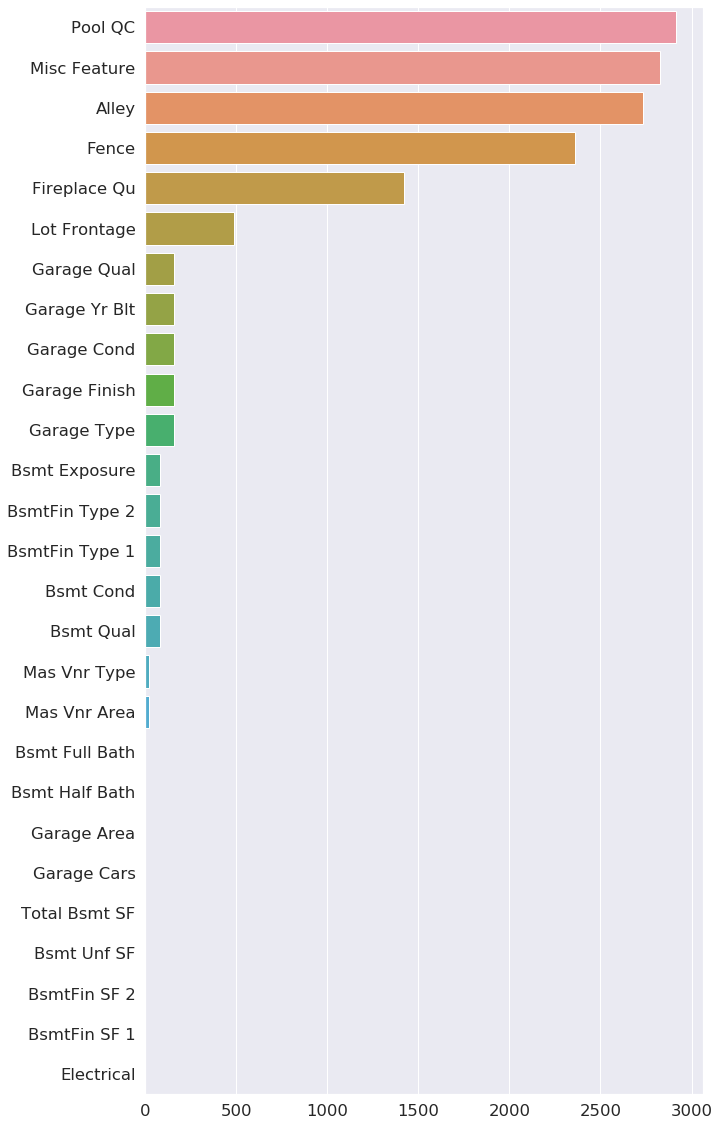

In [10]:
f, ax = plt.subplots(figsize = (10, 20))
sns.barplot(missingNo.values, missingNo.index, ax = ax);

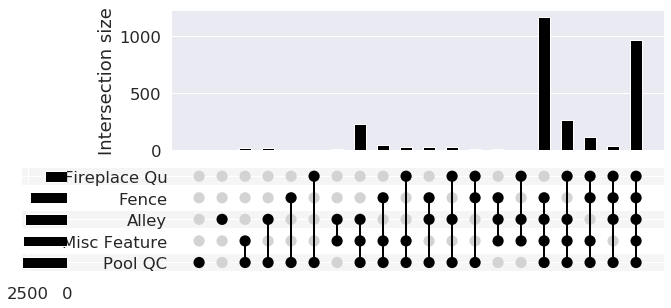

In [11]:
# Use upsetplot to see where missing values occur
# together
# Only use the top 5 columns
missing_cols = missingNo.index[:5].tolist()
missing_counts = (ameshousingDirty.loc[:, missing_cols]
                  .isnull()
                  .groupby(missing_cols)
                  .size())

upsetplot.plot(missing_counts);

> ### Challenge: Missingness
>
> Compare the entries in the "clean" and "dirty" data frames. How was the data cleaned up?

>
> 
> {: .source}
>
> > ## Solution
> > 
> > ~~~
> > # poolQC
> > print(ameshousingDirty['Pool QC'].value_counts())
> > print(ameshousingClean['Pool_QC'].value_counts())
> > # Misc Feature
> > print(ameshousingDirty['Misc Feature'].value_counts())
> > print(ameshousingClean['Misc_Feature'].value_counts())
> > # Alley
> > print(ameshousingDirty['Alley'].value_counts())
> > print(ameshousingClean['Alley'].value_counts())
> > # Fence              2358
> > print(ameshousingDirty['Fence'].value_counts())
> > print(ameshousingClean['Fence'].value_counts())
> > # Fireplace Qu       1422
> > print(ameshousingDirty['Fireplace Qu'].value_counts())
> > print(ameshousingClean['Fireplace_Qu'].value_counts())
> > # Lot Frontage        490
> > print(ameshousingDirty['Lot Frontage'].describe())
> > print(ameshousingClean['Lot_Frontage'].describe())
> > # Garage Qual         159
> > print(ameshousingDirty['Garage Qual'].value_counts())
> > print(ameshousingClean['Garage_Qual'].value_counts())
> > ~~~
> > 
> > {: .output}
> {: .solution}
{: .challenge}

***
## Explore the data to see whether there are any unusual relationships between variables 

#### Pull out numeric and categoric variables:

1. What data types do I have in my data? Can I infer that some of them are categorical, and others are not?

In [12]:
ameshousingClean.dtypes.value_counts()

object     46
int64      33
float64     2
dtype: int64

2. Pull out the categorical and numerical variables

In [13]:
catVars = ameshousingClean.select_dtypes(include = ['object']).columns
numericVars = ameshousingClean.select_dtypes(exclude = ['object']).columns

3. Plot the first 11 numerical variables, and their relationship with sale price

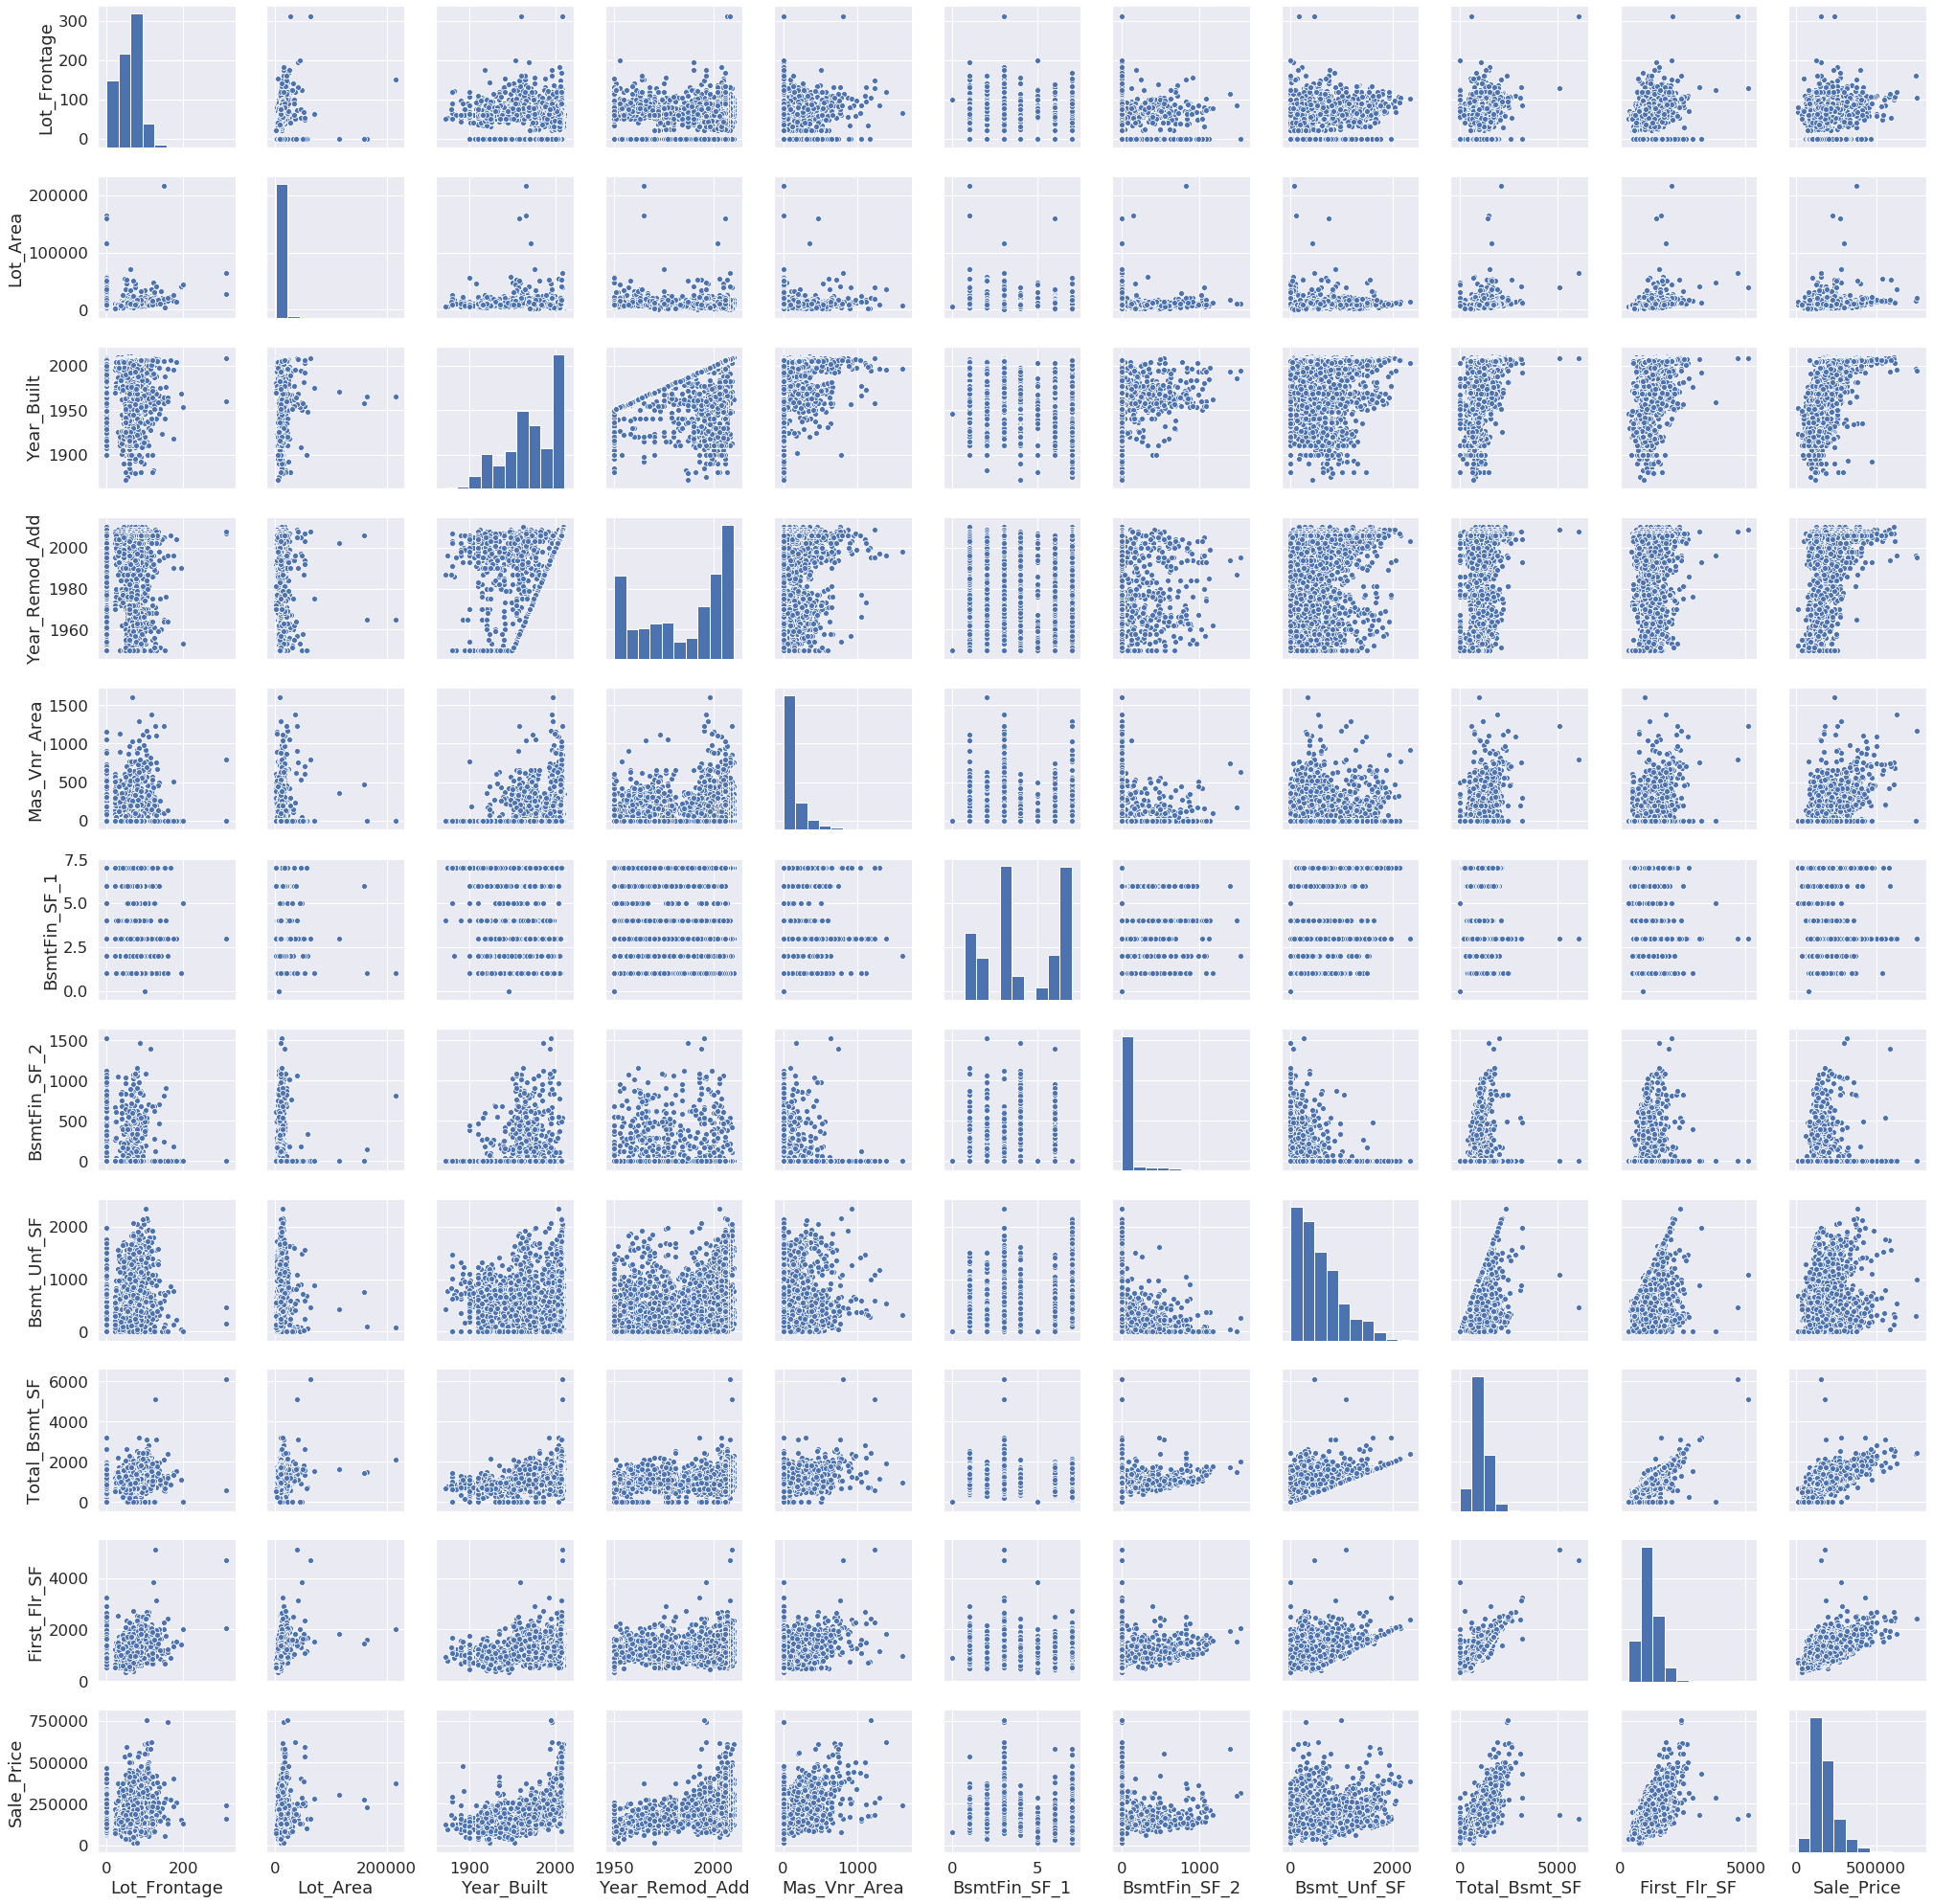

In [14]:
sns.pairplot(
    ameshousingClean,
    vars = numericVars[np.append(np.arange(0, 10), 32)]
);

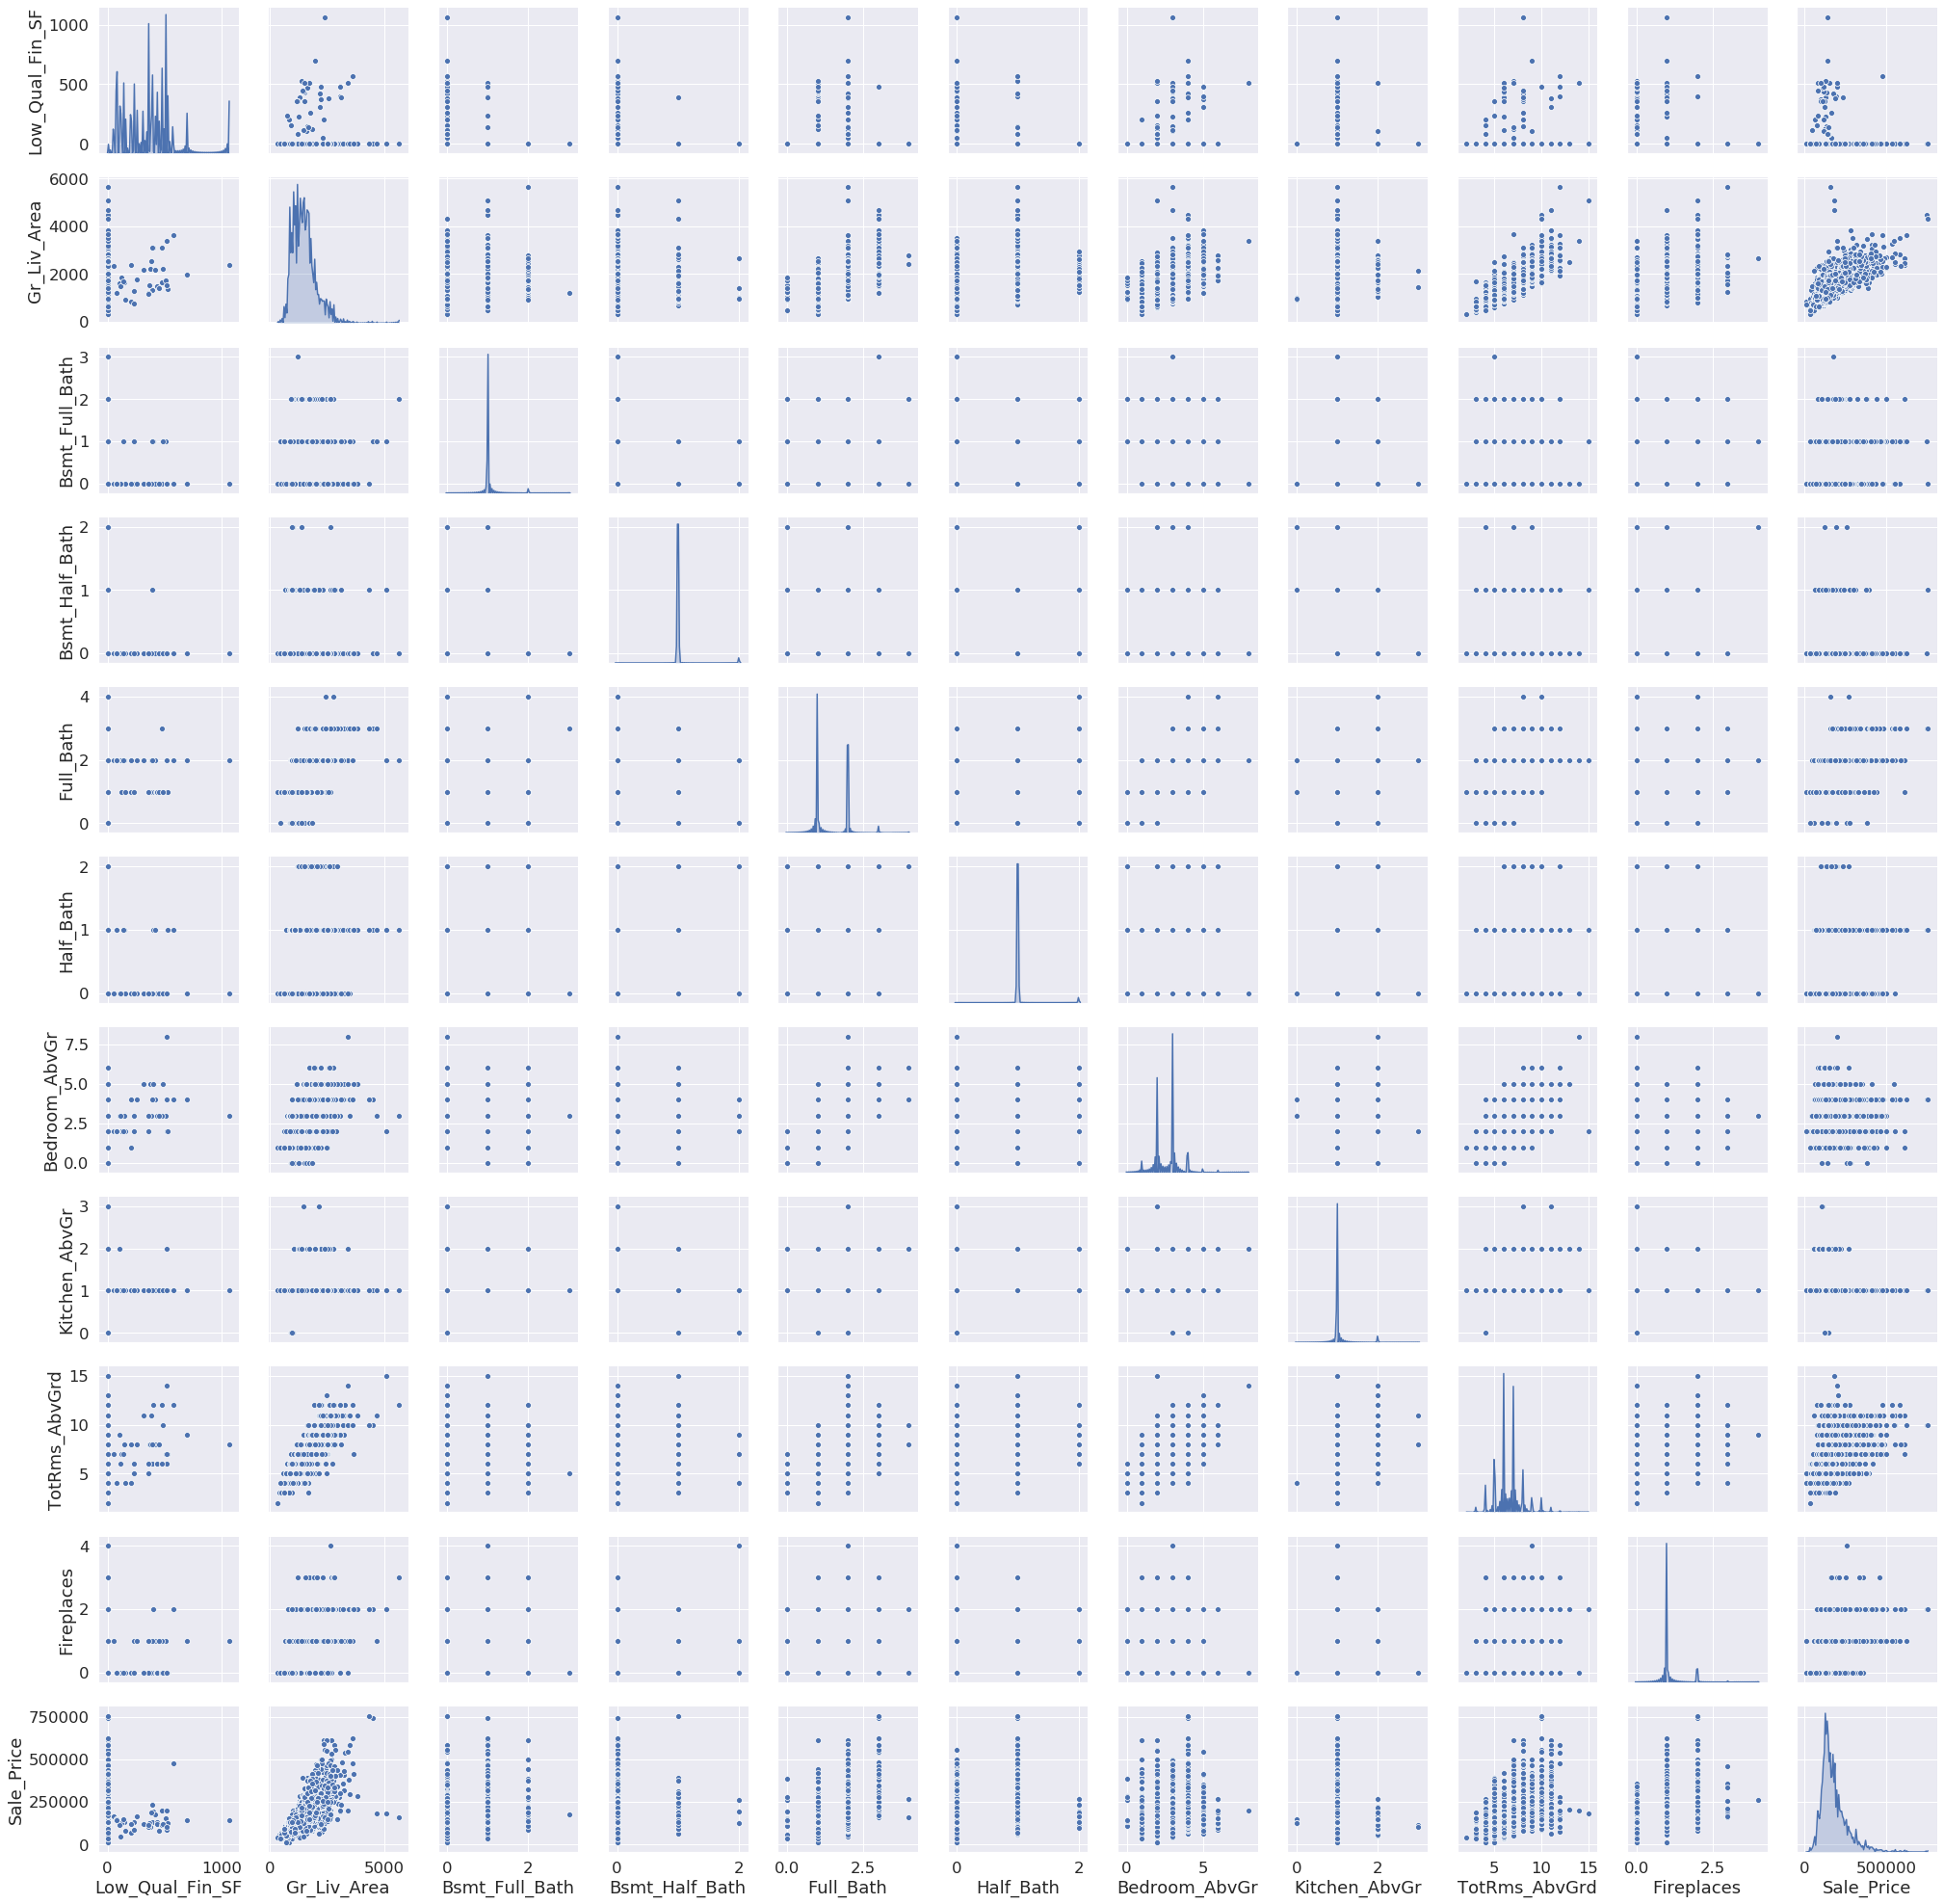

In [15]:
sns.pairplot(
    ameshousingClean,
    diag_kind="kde",
    vars = numericVars[np.append(np.arange(11, 21), 32)],
    diag_kws={'bw': 0.01}
);

Of the numeric variables, which ones are the most correlated (with Sale price, and, more critically, with each other)?
> ## Challenge
>
> What variables are the most correlated with SalePrice?
>
> 
> {: .source}
>
> > ## Solution
> > 
> > ~~~
> > 
> > ameshousingClean[list(numericVars)].corr().round(2).sort_values('Sale_Price', ascending = False)['Sale_Price']
> > 
> > ~~~
> > 
> > {: .output}
> {: .solution}
{: .challenge}




Now generate a correlation plot to visualise this relationship

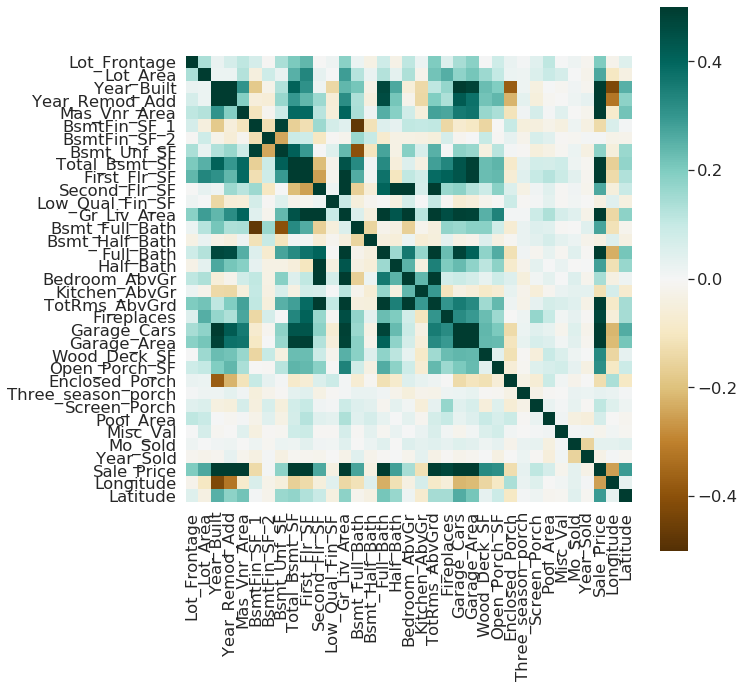

In [16]:
corr = ameshousingClean[numericVars].corr()

# Draw the heatmap with the mask and correct aspect ratio
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(corr,
            cmap=plt.cm.BrBG, 
            vmin=-0.5, vmax=0.5, 
            square=True,
            xticklabels=True, yticklabels=True,
            ax=ax);

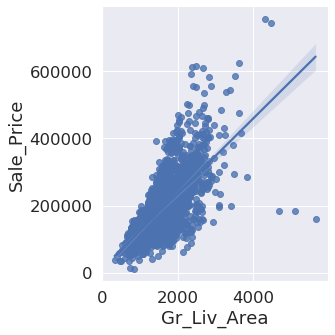

In [17]:
sns.lmplot(
    data = ameshousingClean,
    x = 'Gr_Liv_Area', y = 'Sale_Price'
);

### Explore distribution of Outcome variable

You also need to do EDA on the outcome variable to:

- identify outliers
- explore whether there is any skew in its distribution, and possibly identify a transformation to use when modelling the data

This is because many models, including ordinary linear regression, assume that prediction errors (and hence the response) are normally distributed.

Can you see any outliers in the data? Arguably, the five points on the right, wtih Gr_Liv_Area > 4000, are outliers, that can significantly affect the fit of our model. We will filter these out prior to modelling:

In [18]:
ameshousingClean = ameshousingClean.loc[ameshousingClean['Gr_Liv_Area'] <= 4000, :]

> The next 2 plots do not need to be demonstrated in class, but are here as notes

You can also use violin and box plots to explore the relationship between categorical variables and the Outcome

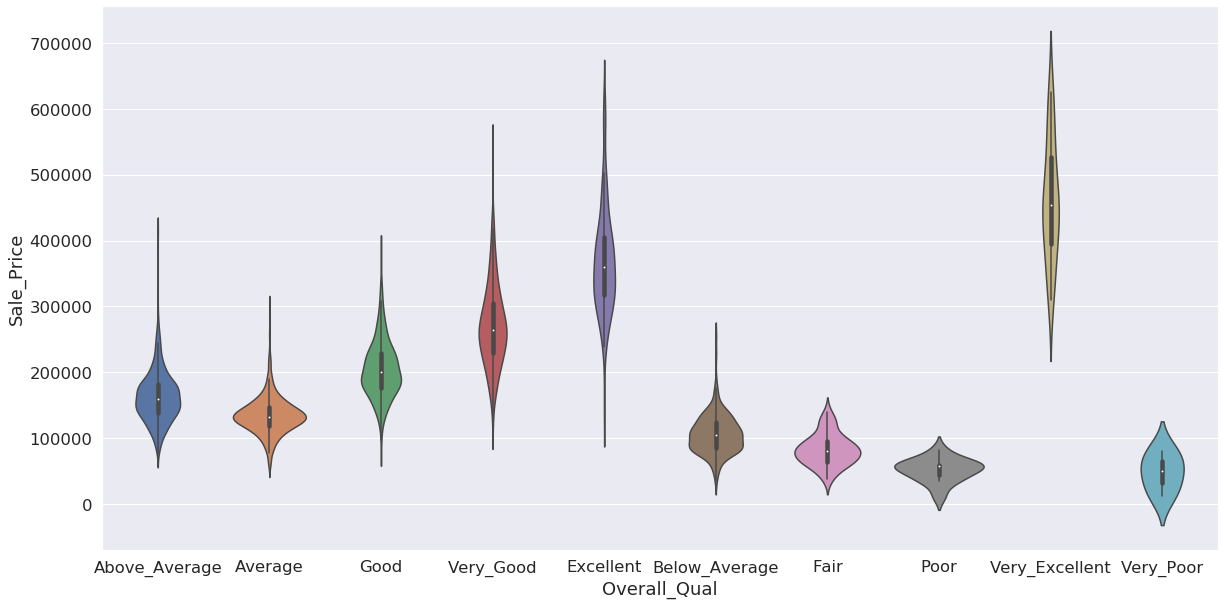

In [19]:
# skip while teaching
f, ax = plt.subplots(figsize = (20, 10))
sns.violinplot(
    x = 'Overall_Qual',
    y = 'Sale_Price',
    data = ameshousingClean,
    ax = ax
);

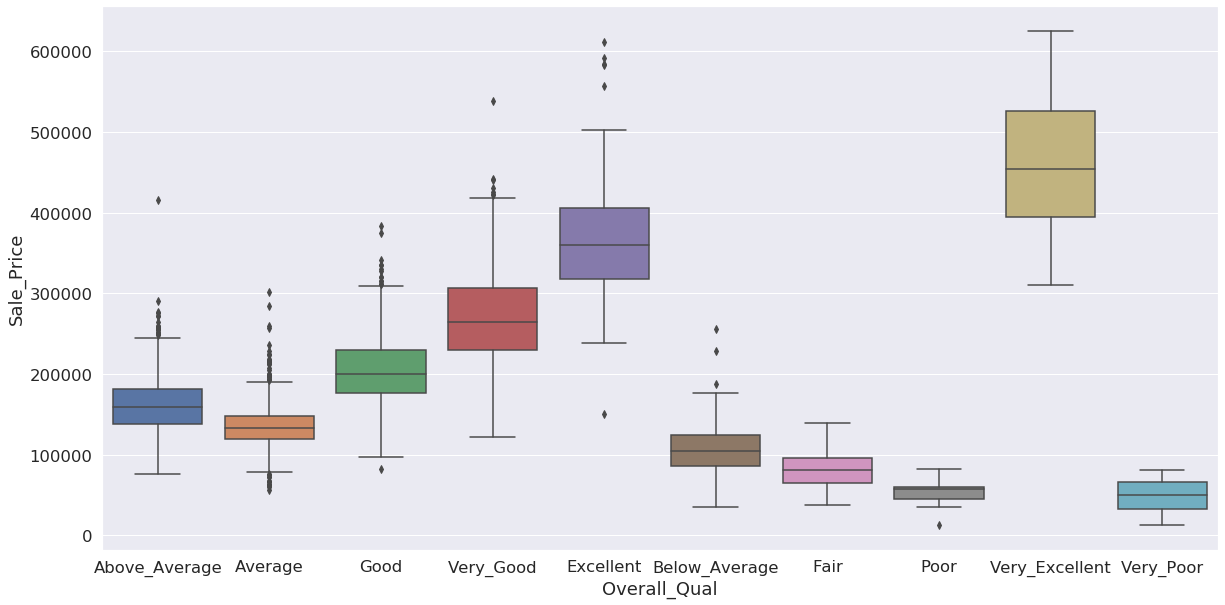

In [20]:
# skip while teaching
f, ax = plt.subplots(figsize = (20, 10))
sns.boxplot(
    x = 'Overall_Qual',
    y = 'Sale_Price',
    data = ameshousingClean,
    ax = ax
);

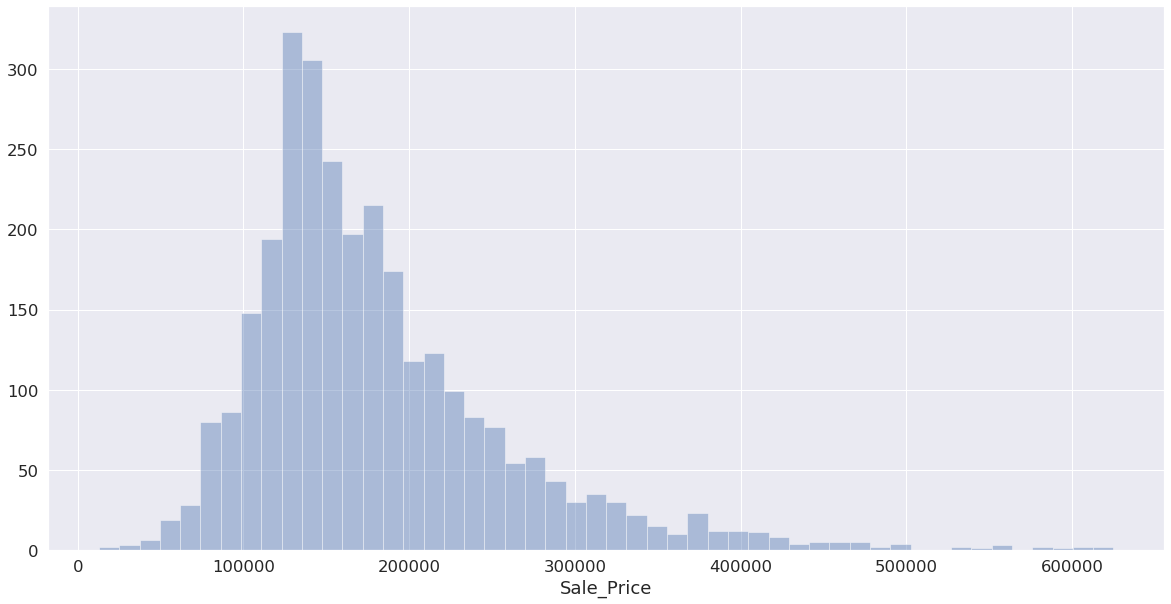

In [21]:
# DO INCLUDE this one though
f, ax = plt.subplots(figsize = (20, 10))
sns.distplot(
    ameshousingClean['Sale_Price'],
    kde = False,
    ax = ax
);

Explore different ways of transforming the Sale Price.

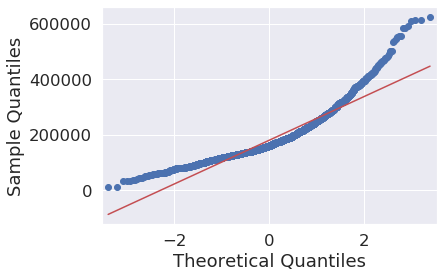

In [22]:
# raw data
sm.qqplot(
    ameshousingClean['Sale_Price'],
    line = 's'
);

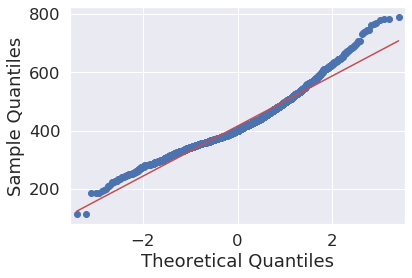

In [23]:
# sqrt transformation
sm.qqplot(
    np.sqrt(ameshousingClean['Sale_Price']),
    line = 's'
);

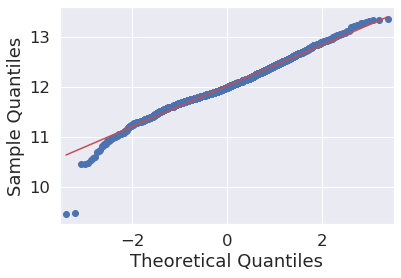

In [24]:
# log transform
sm.qqplot(
    np.log(ameshousingClean['Sale_Price']),
    line = 's'
);

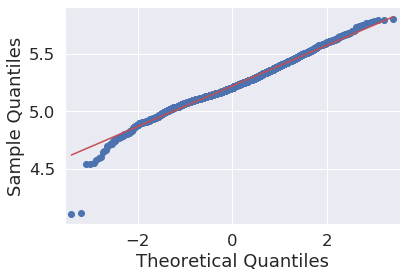

In [25]:
# log10 transform
sm.qqplot(
    np.log10(ameshousingClean['Sale_Price']),
    line = 's'
);

> ## Challenge
>
> If you were working with this dataset, which of the above would you prefer?
>
> 
> {: .source}
>
> > ## Solution
> > 
> > The log10 transformation seems best, as it both helps the distribution look more normal and
> > helps keep our error metrics and final predictions easily interpretable.
> > It also means that the errors of predicting the values of inexpensive 
> > and expensive houses will affect the prediction equally. 
> > 
> > {: .output}
> {: .solution}
{: .challenge}
